c:\Users\Zongo\miniconda3\envs\reinforcment-learning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


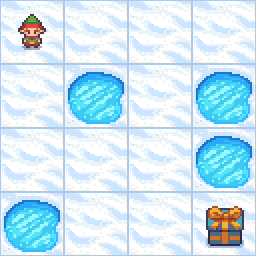

Pick direction ('ZQSD') or A to quit !q
LEFT !


c:\Users\Zongo\miniconda3\envs\reinforcment-learning\lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


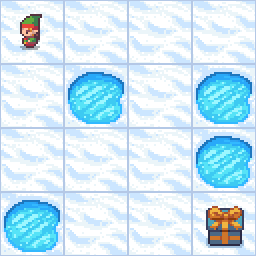

Pick direction ('ZQSD') or A to quit !q
LEFT !


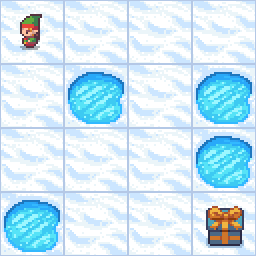

Pick direction ('ZQSD') or A to quit !q
LEFT !


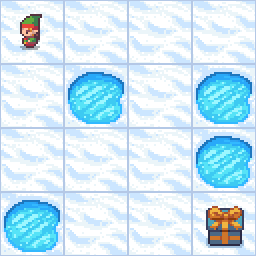

Pick direction ('ZQSD') or A to quit !q
LEFT !


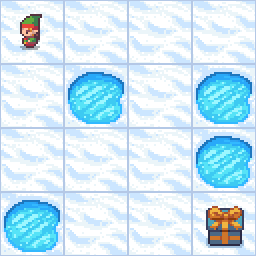

Pick direction ('ZQSD') or A to quit !q
LEFT !


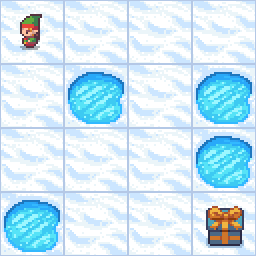

Pick direction ('ZQSD') or A to quit !q
LEFT !


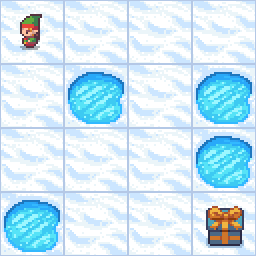

Pick direction ('ZQSD') or A to quit !q
LEFT !


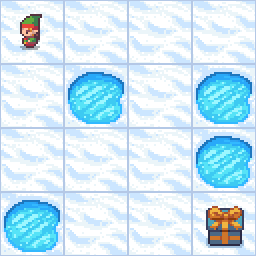

Pick direction ('ZQSD') or A to quit !q
LEFT !


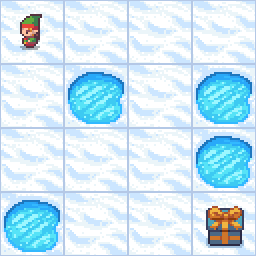

Pick direction ('ZQSD') or A to quit !q
LEFT !


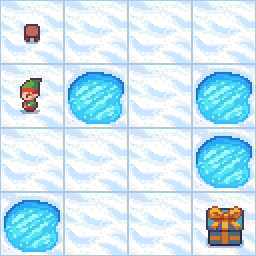

Pick direction ('ZQSD') or A to quit !q
LEFT !


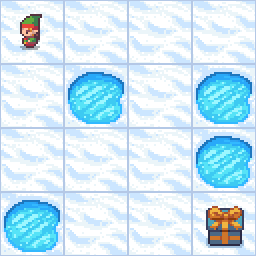

Pick direction ('ZQSD') or A to quit !q
LEFT !


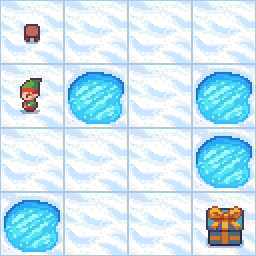

Pick direction ('ZQSD') or A to quit !q
LEFT !


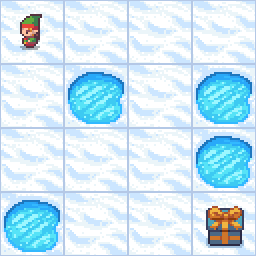

Pick direction ('ZQSD') or A to quit !q
LEFT !


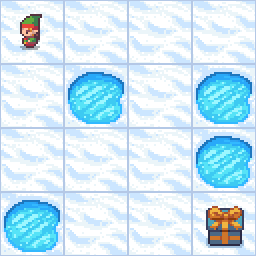

Pick direction ('ZQSD') or A to quit !q
LEFT !


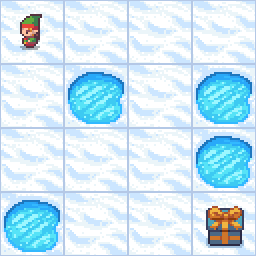

Pick direction ('ZQSD') or A to quit !q
LEFT !


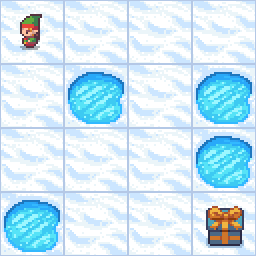

Pick direction ('ZQSD') or A to quit !q
LEFT !


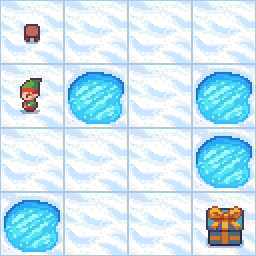

Pick direction ('ZQSD') or A to quit !q
LEFT !


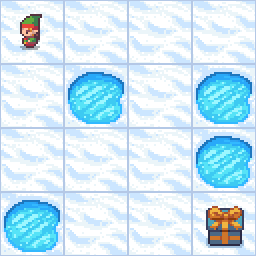

Pick direction ('ZQSD') or A to quit !q
LEFT !


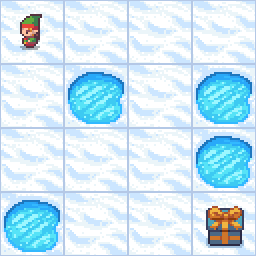

Pick direction ('ZQSD') or A to quit !q
LEFT !


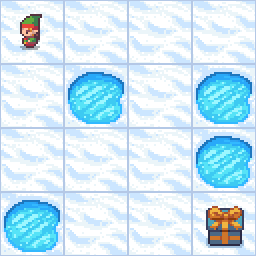

Pick direction ('ZQSD') or A to quit !q
LEFT !


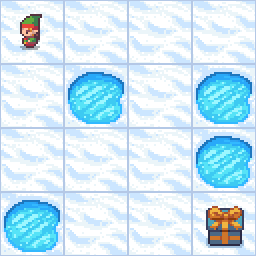

Pick direction ('ZQSD') or A to quit !q
LEFT !


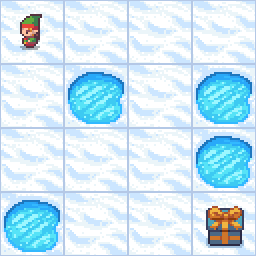

Pick direction ('ZQSD') or A to quit !q
LEFT !


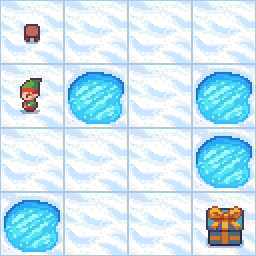

Pick direction ('ZQSD') or A to quit !q
LEFT !


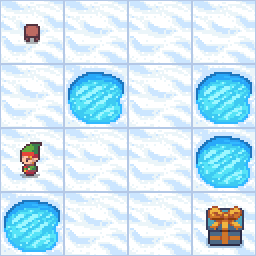

Pick direction ('ZQSD') or A to quit !z
UP !


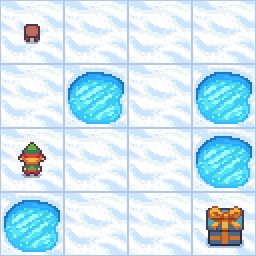

Pick direction ('ZQSD') or A to quit !z
UP !


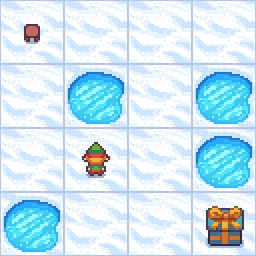

Pick direction ('ZQSD') or A to quit !s
DOWN !


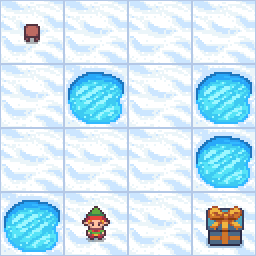

Pick direction ('ZQSD') or A to quit !d
RIGHT !


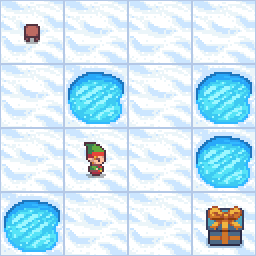

Pick direction ('ZQSD') or A to quit !s
DOWN !


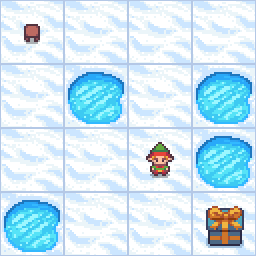

Pick direction ('ZQSD') or A to quit !q
LEFT !


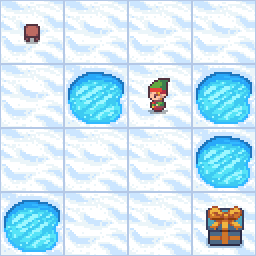

Pick direction ('ZQSD') or A to quit !q
LEFT !


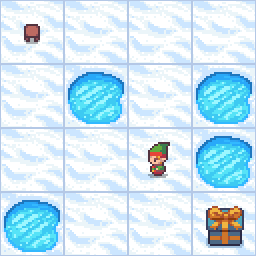

Pick direction ('ZQSD') or A to quit !q
LEFT !


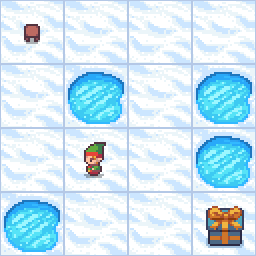

Pick direction ('ZQSD') or A to quit !s
DOWN !


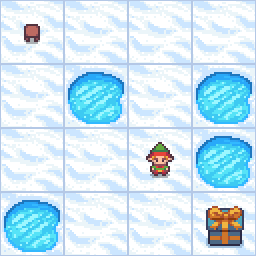

Pick direction ('ZQSD') or A to quit !q
LEFT !


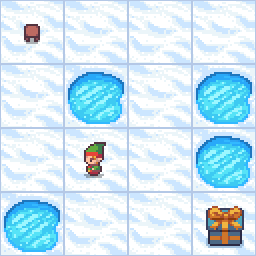

Pick direction ('ZQSD') or A to quit !s
DOWN !


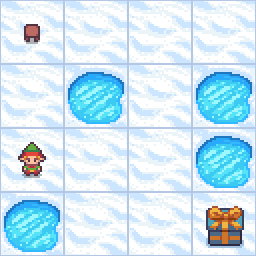

Pick direction ('ZQSD') or A to quit !z
UP !


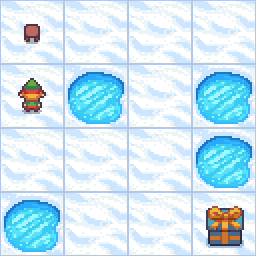

Pick direction ('ZQSD') or A to quit !q
LEFT !


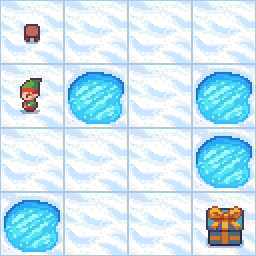

Pick direction ('ZQSD') or A to quit !q
LEFT !


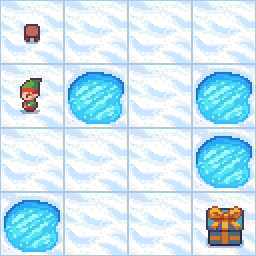

Pick direction ('ZQSD') or A to quit !q
LEFT !


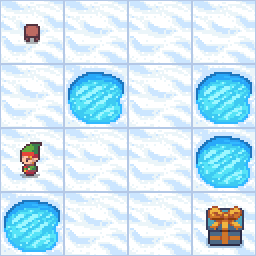

Pick direction ('ZQSD') or A to quit !z
UP !


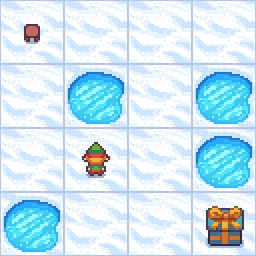

Pick direction ('ZQSD') or A to quit !s
DOWN !


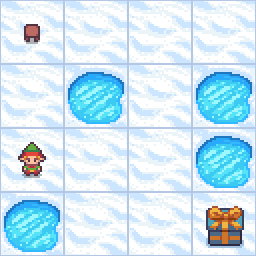

Pick direction ('ZQSD') or A to quit !q
LEFT !


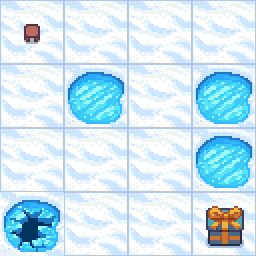

In [1]:
import gymnasium as gym
from gymnasium.utils.play import play
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from PIL import Image
import numpy as np
from IPython.display import display # to display images

from typing import TypeVar, List, Tuple

# Utility functions

def displayGame(environment):
    rgb_array = environment.render()
    image = Image.fromarray(rgb_array)
    display(image)
    pass

desc=["SFFF", "FHFH", "FFFH", "HFFG"] # Same as the map called "4*4"
dimension_desc = (4, 4)
nrow = 4
ncol = 4
environment = gym.make('FrozenLake-v1', desc=desc, is_slippery=True, render_mode="rgb_array")

# random_policy = np.array()

# Get the action space dimension
# See https://stackoverflow.com/a/62306159
# In our case, it's a standard discrete space
action_space_length: int = environment.action_space.n

# Get the observation space
environment_space_length: int = environment.observation_space.n

# Build our random policy

from src.Policy import Policy
from src.PolicyAgent import PolicyAgent
random_policy_object = Policy(np.full((environment_space_length, action_space_length), 1 / action_space_length))

# Initialisation

random_agent = PolicyAgent(random_policy_object, initial_state_index = 0)

stop = False
environment.reset()
displayGame(environment)

while not stop:
    '''
    While Agent is not stopped
    Agent pick an action from its state and its policy
    Agent perform the action
    Agent update its trajectory: action taken, new state, new reward
    Update the stop condition if Goal reached or terminated
    '''
    next_action_index = random_agent.pickNextAction()
    observation, reward, terminated, truncated, info = environment.step(next_action_index)
    random_agent.nextStep(observation, next_action_index, float(reward))
    stop = terminated or truncated
    # Render the game
    displayGame(environment)


